# Week 5, Lab \#4

*February 14, 2024*

```sh
# Possibly required
pip install requests numpy
```

In today's lab, we'll practice working with NumPy arrays using two different climate datasets:

- [A record of ice break-up on the Nenana River in Alaska.](https://nsidc.org/data/nsidc-0064/versions/2)
- [Soil temperatures from the Montana AgriMet station in Corvallis, Montana.](https://mesonet.climate.umt.edu/dash/)

## Lab 4, Part 1: Nenana Ice Classic

Every year, Alaska residents compete to guess when the ice in the Nenana River in central Alaska will break up, enabling navigation of this historically important waterway. [Participants bet the exact minute when the ice will break up](https://www.nenanaakiceclassic.com/) and the a correct guess can net winners tens or hundreds of thousands of dollars!

Below is some Python code I provided to prepare the data for you: **a NumPy array with 105 rows, one for each (contest) year. The two columns represent the Julian date of the year and the hour when the ice broke up, respectively.**

In [1]:
import requests
import numpy as np

content = requests.get('http://files.ntsg.umt.edu/data/GIS_Programming/data/NenanaIceClassic_1917-2021_105x2_JDate+Hour.flt32')
data = np.frombuffer(content.content, dtype = np.float32)\
    .reshape((105, 2))

For example:

- A Julian date of 120.4 means the ice broke up on the 120th day of the year at the hour `0.4 * 24 = 9.6` (9:36 AM local time).

[**This table will help you convert between calendar days (Month, Day) and Julian days.**](https://landweb.modaps.eosdis.nasa.gov/browse/calendar.html)

If you're trying to get the integer part of a number, remember that you can use `int()` without worrying about rounding:

In [2]:
int(120.99)

120

---

## Problem 4.1: Average Break-Up Date

With no other information available to us, the mean Julian date of break-up might be the best prediction for this year's break-up.

Write Python code that determines:

- The earliest (Julian) day of break-up
- The latest (Julian) day of break-up
- The mean (Julian) day of break-up

For each of these, your Python code should **print a single numeric value,** *not* an array of more than one value; i.e., you may need to index an array to get a single value.

In [2]:
data[0:5]

array([[120.4792,  11.    ],
       [131.3979,   9.    ],
       [123.6063,  14.    ],
       [132.4486,  10.    ],
       [131.2792,   6.    ]], dtype=float32)

In [8]:
earliest = np.min(data[:,0])
latest = np.max(data[:,0])
average = np.mean(data[:,0])

In [9]:
print(f'Earliest day: {int(earliest)}')
print(f'Latest day: {int(latest)}')
print(f'Average day: {int(average)}')

Earliest day: 104
Latest day: 141
Average day: 124


---

## Problem 4.2: Early Break-Up

**In which years did the Nenana break-up occur before May 1?** Write Python code to answer this question. 

May 1 is the 121st day of the year, at the earliest (depending on whether or not it is a leap year), but *let's pretend that every year is a standard (non-leap) year.* **Recall that the years in this dataset range from 1917 to 2021, inclusive.**

**Hint:** There are multiple ways to solve this problem and they might involve functions like `np.arange()` or `np.argwhere()`, if you're looking for a place to start.

In [7]:
early = np.argwhere(data[:,0] < 121)
early + 1917

array([[1917],
       [1926],
       [1934],
       [1939],
       [1940],
       [1942],
       [1943],
       [1951],
       [1953],
       [1958],
       [1969],
       [1978],
       [1979],
       [1980],
       [1981],
       [1983],
       [1988],
       [1990],
       [1993],
       [1994],
       [1995],
       [1997],
       [1998],
       [1999],
       [2003],
       [2004],
       [2005],
       [2007],
       [2010],
       [2012],
       [2014],
       [2015],
       [2016],
       [2019],
       [2020],
       [2021]], dtype=int64)

---

## Problem 4.3: Hour of Break-up

Using either:

- A `for` loop, or
- A Python function

**Write Python code that determines the most common hour of break-up.** There may be two or more hours tied for the most common! Be sure to note whether or not this is the case.

In [33]:
# Count occurrences of unique values in data[:,1]
unique_values, counts = np.unique(data[:,1], return_counts = True)

In [18]:
counts

array([ 1,  1,  1,  1,  2,  7,  6,  8, 11, 10,  9, 11,  6,  6,  7,  6,  4,
        3,  2,  3], dtype=int64)

In [19]:
unique_values

array([ 0.,  1.,  2.,  5.,  6.,  9., 10., 11., 12., 13., 14., 15., 16.,
       17., 18., 19., 20., 21., 22., 23.], dtype=float32)

In [38]:
np.argwhere(counts == np.max(counts))

array([[ 8],
       [11]], dtype=int64)

In [34]:
print(f"at the {int(unique_values[8])}th and {int(unique_values[11])}th hours, ice melted {np.max(counts)} times")

at the 12th and 15th hours, ice melted 11 times


---

## Lab 4, Part 2: Corvallis Soil Temperatures

In this next section, we'll use data on soil temperatures from the AgriMet station in Corvallis, MT.

The `temps` array, below, contains soil temperatures for each of 4 soil layers (depths below) from 2017-01-01 through 2022-12-31.

- 10 cm depth
- 20 cm depth
- 50 cm depth
- 90 cm depth

*Note:* I have modified this time series so that there is no February 29 in 2022; i.e., there are no leap years in these data.

In [4]:
import requests
content = requests.get('http://files.ntsg.umt.edu/data/GIS_Programming/data/MT_AgriMet_soil_temps_Corvallis_20170101-20221231_2190x4.float32')
temps = np.frombuffer(content.content, dtype = np.float32)\
    .reshape((2190, 4))

temps.shape

(2190, 4)

In [39]:
temps[0:5]

array([[29.716, 32.117, 34.641, 39.92 ],
       [29.529, 32.   , 34.509, 39.852],
       [29.075, 31.865, 34.333, 39.74 ],
       [27.981, 31.591, 34.167, 39.684],
       [26.011, 31.014, 34.077, 39.56 ]], dtype=float32)

## Problem 4.4: Soil Temperature Profile

Write Python code to calculate the range (maximum minus minimum) in soil temperatures for each depth.

In [5]:
ranges = []

max = np.nanmax(temps, axis = 0)
min = np.nanmin(temps, axis = 0)
range = max - min

ranges.append(range)
ranges

[array([76.968   , 56.876   , 45.117   , 36.488003], dtype=float32)]

---

## Problem 4.5: Soil Temperature Climatology

A **climatology** is a climate record that records the average conditions on each date, month, or year for a certain length of time. For example, a monthly air temperature climatology would consist of 12 values: the mean monthly air temperature in each month.

**Write Python code to compute a 365-day soil temperature climatology for each soil layer.** That is, there should be an average soil temperature value, for each soil layer, for each day of a 365-day year.

**Hint:** The easiest way to do this would be to reshape the `temps` array *so that you can calculate the average along a certain axis.* Assume there are 365 days in each year in this (6-year) record.

In [6]:
temps2 = temps.reshape((6, 365, 4))

In [7]:
# Average for the year where axis 0 is years and axis 1 is soil layers
np.nanmean(temps2, axis = 1)

array([[51.777725, 51.450325, 51.208237, 51.660248],
       [51.018322, 50.508167, 50.52443 , 51.298485],
       [50.10955 , 49.1798  , 49.171238, 49.99211 ],
       [52.005074, 50.932476, 50.87868 , 51.327137],
       [48.061363, 47.695133, 47.54164 , 48.269466],
       [50.957657, 49.565834, 49.60309 , 50.37357 ]], dtype=float32)

In [8]:
# Average for each day, regardless of year
daily_avgs = np.nanmean(temps2, axis = 0)
daily_avgs

array([[29.680334, 31.710833, 34.128666, 39.64967 ],
       [29.797998, 31.76467 , 34.156998, 39.55917 ],
       [30.781166, 31.761002, 34.156834, 39.48833 ],
       ...,
       [30.286499, 30.658333, 34.515667, 40.17133 ],
       [30.981665, 31.156668, 34.296833, 40.011833],
       [30.922998, 31.722666, 34.236   , 39.858166]], dtype=float32)

---

## Extra Challenge: Plotting Soil Temperatures

Using `matplotlib.pyplot()`, create a line plot showing the 365-day soil temperature climatology for each soil layer. The temperature in each soil layer should be shown as a separate line, using a separate color, with a legend to differentiate the soil depths. The horizontal (X) axis should show the day of year. As usual, this is not for extra credit, just for extra fun.

In [9]:
np.shape(daily_avgs)

(365, 4)

In [19]:
import numpy as np
days = np.arange(1, 366)
days

array([  1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,  13,
        14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,  26,
        27,  28,  29,  30,  31,  32,  33,  34,  35,  36,  37,  38,  39,
        40,  41,  42,  43,  44,  45,  46,  47,  48,  49,  50,  51,  52,
        53,  54,  55,  56,  57,  58,  59,  60,  61,  62,  63,  64,  65,
        66,  67,  68,  69,  70,  71,  72,  73,  74,  75,  76,  77,  78,
        79,  80,  81,  82,  83,  84,  85,  86,  87,  88,  89,  90,  91,
        92,  93,  94,  95,  96,  97,  98,  99, 100, 101, 102, 103, 104,
       105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117,
       118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130,
       131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143,
       144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155, 156,
       157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168, 169,
       170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 180, 18

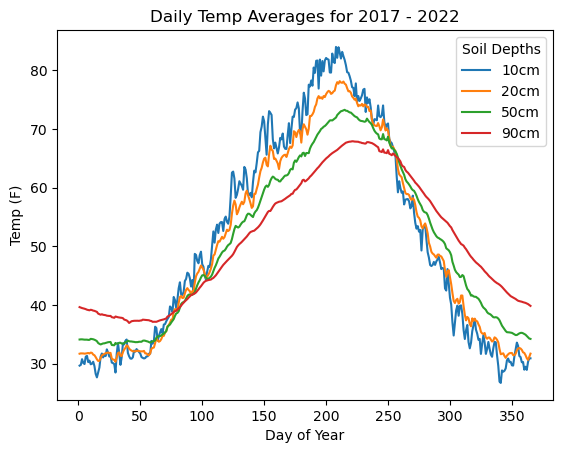

In [28]:
import matplotlib.pyplot as plt

plt.plot(days, daily_avgs[:, 0], label='10cm')
plt.plot(days, daily_avgs[:, 1], label='20cm')
plt.plot(days, daily_avgs[:, 2], label='50cm')
plt.plot(days, daily_avgs[:, 3], label='90cm')

plt.title('Daily Temp Averages for 2017 - 2022')
plt.xlabel('Day of Year')
plt.ylabel('Temp (F)')
plt.legend(title = 'Soil Depths')

plt.show()